<a href="https://colab.research.google.com/github/nguyenhanphinam/BTAI2/blob/main/moneyipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img,img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt
from skimage import io
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from tensorflow.keras.optimizers import Adam

In [ ]:
from google.colab import drive
drive.mount("/content/drive",force_remount=True)

Mounted at /content/drive


In [ ]:
cd '/content/drive/MyDrive/BtAI2/mon_an_VN'

/content/drive/MyDrive/BtAI2/mon_an_VN


In [ ]:
trainset='/content/drive/MyDrive/BtAI2/Money_VN/training_test'
validationset='/content/drive/MyDrive/BtAI2/Money_VN/validation'
train=ImageDataGenerator(rescale=1/255.0)
validation=ImageDataGenerator(rescale=1/255.0,validation_split=0.99)

In [ ]:
training_data=train.flow_from_directory(trainset,target_size=(150,150),batch_size=10,class_mode='categorical',subset="training",shuffle=True,)

Found 580 images belonging to 11 classes.


In [ ]:
validation_set=validation.flow_from_directory(validationset,target_size=(150,150),batch_size=10,class_mode='categorical',shuffle=True,subset="validation",)

Found 99 images belonging to 11 classes.


In [ ]:
training_data.class_indices
{'1k': 0, '2k': 1, '5k': 2, '10k': 3, '20k': 4, '50k': 5, '100k': 6, '200đ': 7, '200k': 8, '500đ': 9, '500k': 10 }

{'100k': 6,
 '10k': 3,
 '1k': 0,
 '200k': 8,
 '200đ': 7,
 '20k': 4,
 '2k': 1,
 '500k': 10,
 '500đ': 9,
 '50k': 5,
 '5k': 2}

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

In [ ]:
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(11,activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
history=model.fit(training_data,batch_size=5,epochs=100,verbose=1,validation_data=validation_set)

Epoch 1/100
58/58 [==============================] - 413s 7s/step - loss: 2.7345 - accuracy: 0.1414 - val_loss: 2.2768 - val_accuracy: 0.1616
Epoch 2/100
58/58 [==============================] - 2s 37ms/step - loss: 2.0039 - accuracy: 0.3431 - val_loss: 1.6346 - val_accuracy: 0.4141
Epoch 3/100
58/58 [==============================] - 2s 37ms/step - loss: 1.2234 - accuracy: 0.6534 - val_loss: 0.4397 - val_accuracy: 0.8788
Epoch 4/100
58/58 [==============================] - 2s 37ms/step - loss: 0.5881 - accuracy: 0.8397 - val_loss: 0.0808 - val_accuracy: 0.9596
Epoch 5/100
58/58 [==============================] - 2s 38ms/step - loss: 0.2843 - accuracy: 0.9241 - val_loss: 0.0434 - val_accuracy: 0.9899
Epoch 6/100
58/58 [==============================] - 2s 38ms/step - loss: 0.1329 - accuracy: 0.9655 - val_loss: 0.0372 - val_accuracy: 0.9798
Epoch 7/100
58/58 [==============================] - 2s 38ms/step - loss: 0.2493 - accuracy: 0.9603 - val_loss: 0.0493 - val_accuracy: 0.9798
Epoch 

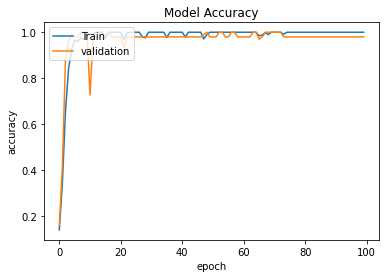

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','validation'],loc='upper left')
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/BtAI2/Money_VN.h5')

In [ ]:
load_model('/content/drive/MyDrive/BtAI2/Money_VN.h5')

Found 11 images belonging to 11 classes.


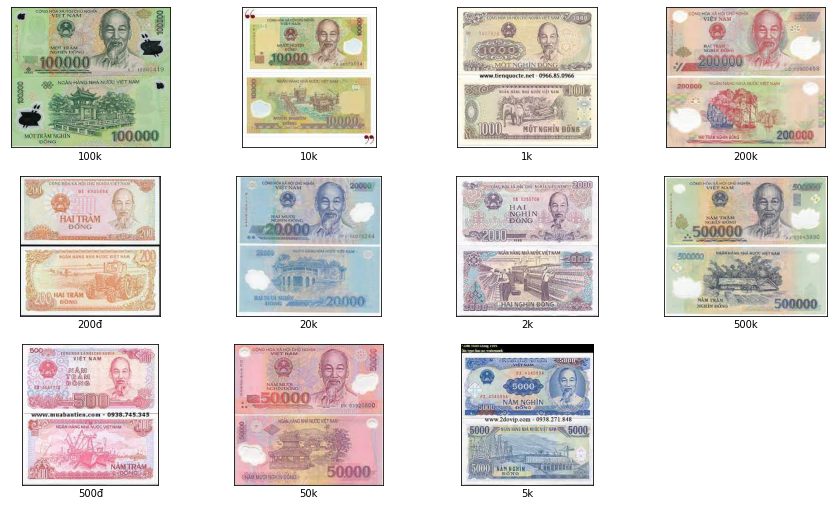

In [ ]:
generator= ImageDataGenerator(rescale=1./255)
generator_data=generator.flow_from_directory('/content/drive/MyDrive/BtAI2/Money_VN/test_money',batch_size=5,shuffle=False,interpolation='lanczos')

money={0:'100k',
      1:'10k',
      2:'1k',
      3:'200k',
      4:'200đ',
      5:'20k',
      6:'2k',
      7:'500k',
      8:'500đ',
      9:'50k',
      10:'5k'}
  
plt.figure(figsize=(15,15))
for i in range(len(generator_data.filenames)):
    plt.subplot(5,4,i+1)
    plt.imshow(io.imread(os.path.join(generator_data.directory,generator_data.filenames[i])))
    plt.xticks([])
    plt.yticks([])
    img=load_img('/content/drive/MyDrive/BtAI2/Money_VN/test_money/'+generator_data.filenames[i],target_size=(150,150))
    img=img_to_array(img)
    img=img.reshape(1,150,150,3)
    img=img.astype('float')
    img=img/255
    plt.xlabel(money[np.argmax(model.predict(img))]) 
plt.show()